# 1. 요약
  
  - pixabay 의 사진이미지 파일 다운로드
  - 다양한 이미지로 인물사진을 조작하고자 함
 

# 2. 결과  

## 2.1. test_001

  - 사람으로 제대로 인식 : 아웃포커싱할 함 경계가 부드럽게 변화하지 못해 자연스럽지 않음
  - 경계부분에 선이 형성

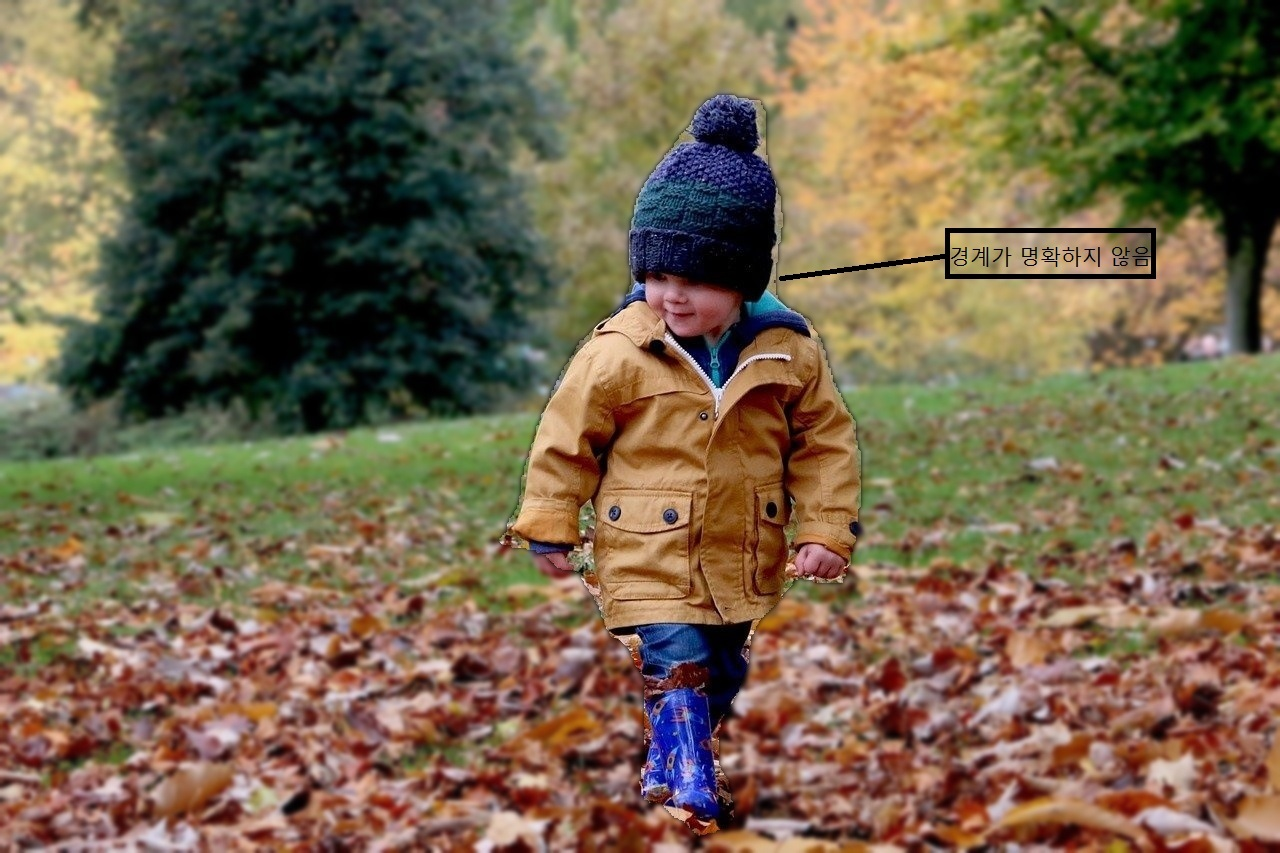


  - 경계부분 그라디에이션으로 부드러워지는 효과를 나타내는 코드를 찾음
    - 가우시안 Blur로 처리하면 부드럽다고 하여 시행
    - 수많은 시행착오를 거쳤지만 계속하여 오류발생
    - 시간 여유가 있을 때 다시 진행하여 오류를 잡아서 고쳐볼 생각임
    - 아래 셀에 예시코드 기재 

In [ ]:
#<예시코드> 
'''
#Blurring

import cv2

#blur original image
blurred_img = cv2.GaussianBlur(image, (25, 25), 0)

#blur mask image
#사람경계를 부드럽게 처리 
mask_3d_blurred = (cv2.GaussianBlur(mask_3d*255, (101, 101), 25, 25) / 255).astype(np.float32)

#mix it together
person_mask = mask_3d_blurred*image.astype(np.float32)
bg_mask = (1 - mask_3d_blurred) * blurred_img.astype(np.float32)
out = (person_mask + bg_mask).astype(np.uint8)


plt.figure(figsize=(15, 20))
plt.subplot(2, 2, 1)
plt.title('person mask')
plt.imshow(person_mask.astype(np.uint8))
plt.subplot(2, 2, 2)
plt.title('bg_mask')
plt.imshow(bg_mask.astype(np.uint8))

plt.subplot(2, 2, 3)
plt.title('original image')
plt.imshow(image.astype(np.uint8)

plt.subplot(2, 2, 4)
plt.title('output image')
plt.imshow(out.astype(np.uint8))
'''

## 2.2. test_005

  - 물구나무 선 이미지
  - 사람으로 인식하는데 어려움이 생김
  - 해결 방법 : 이미지를 회전시켜 처리 후 다시 회전시키면 가능
    - 코드 상에 회전을 시킬려 했지만 실력이 부족하여 작성하지 못함
    - 이미지 처리 프로그램에서 이미지를 180도 회전한 후 처리하여 성공함
    - 다시 처리할려니 계속 오류발생하여 실행 중단함


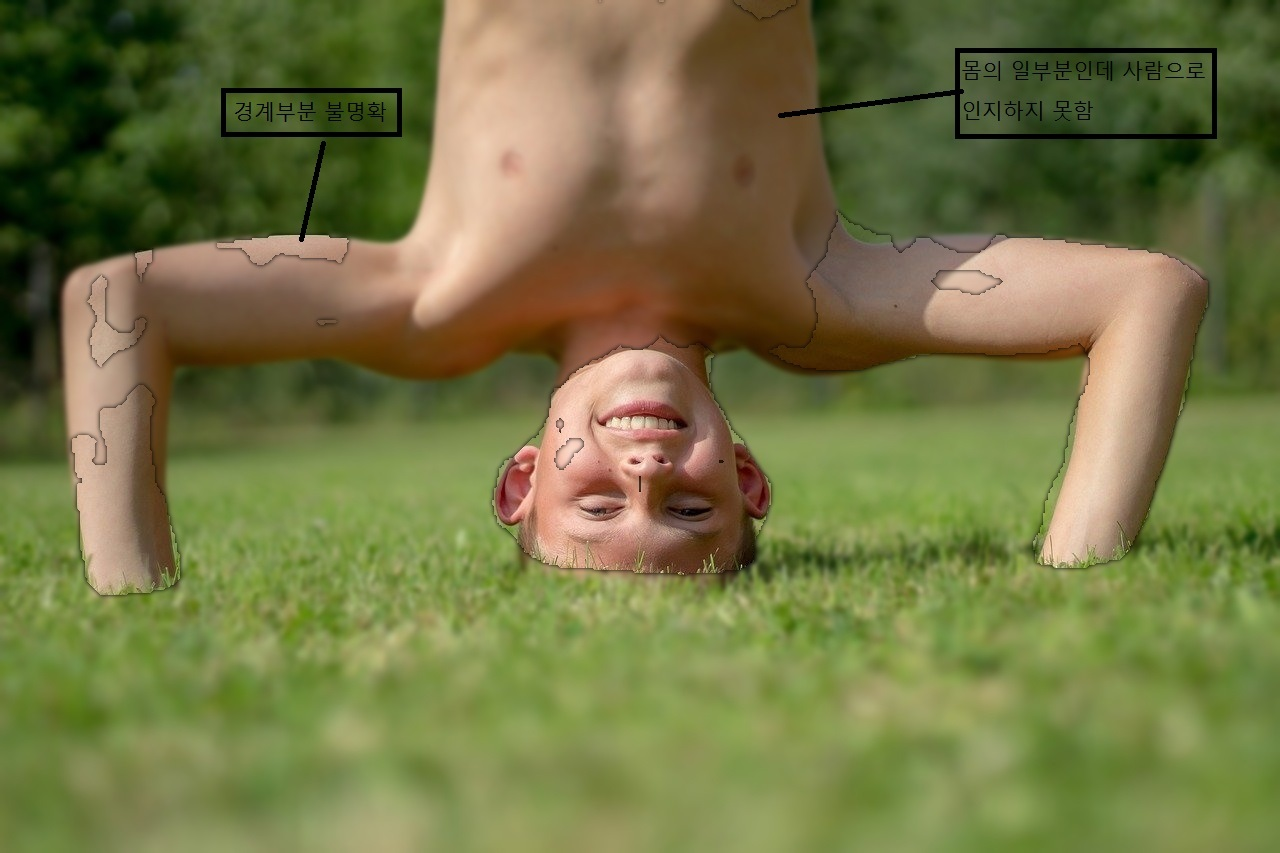

## 2.3. test_007

  - 사람과 개가 함께 걷고 있는 이미지
  - 사람이 아닌 개에 포커싱을 맞춰서 이미지 처리함
  - 사람 다리가 개의 몸을 가림
    - 개의 앞부분만 포커싱이 맞춰짐
    - 몸통과 꼬리 부분은 흐리게 처리됨
  - 해결방법
    - 형체를 가로막아서 나누는 형태를 연결하여 생각할 수 있어야 함
    - 형체의 이미지가 끊어졌을 때 이어지는 과정을 학습시키면 가능
    - 지금 내 실력으로 어림없는 상상임


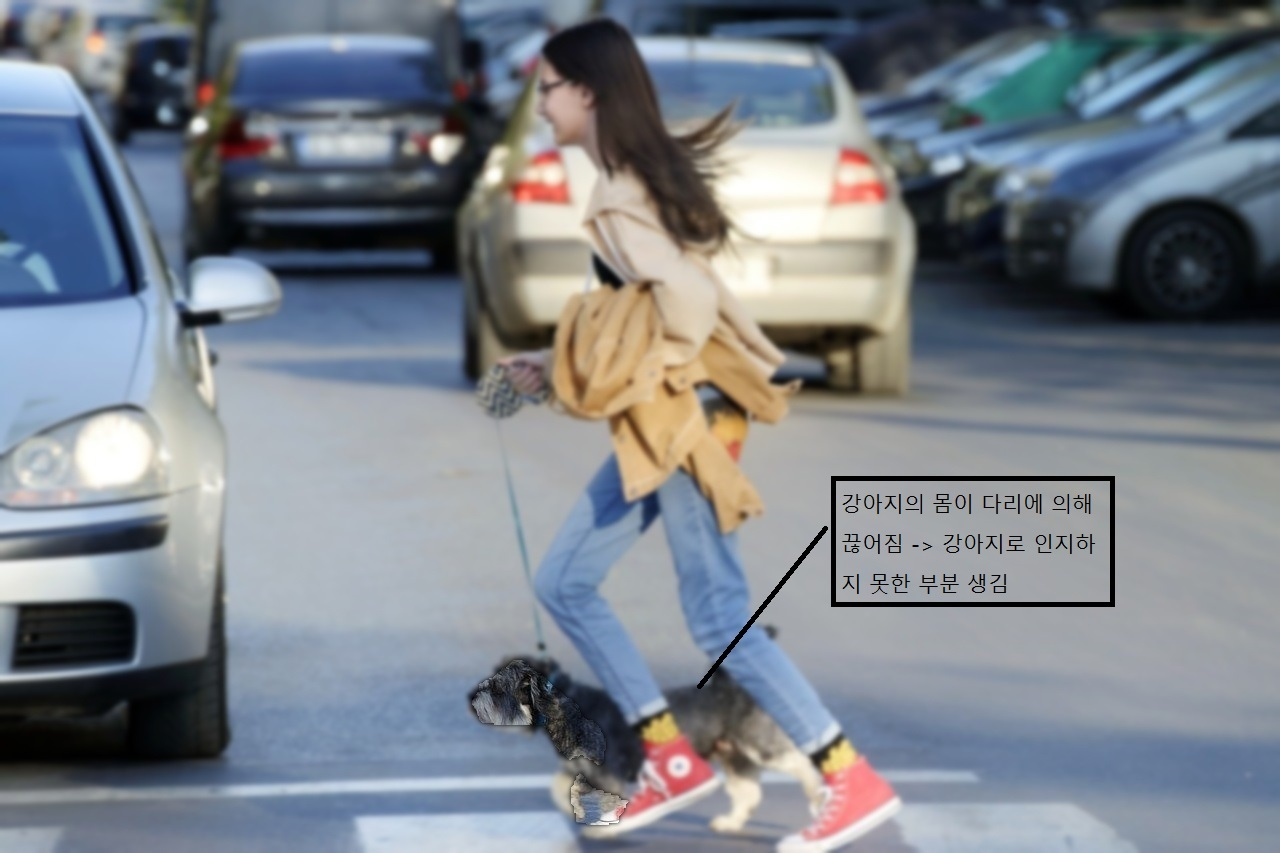

# 3. 회고

  - 생각해볼 점들
    - 노드에 올려진 코딩도 아직 제대로 이해하지 못함
    - 복사하여 붙여넣고 그것을 하나씩 이해하는데 시간이 오래 걸림
    - 인물을 인지하기 어려운 이미지들이 몇 개 더 남아있음
      - 역광으로 사람 모습이 검게 나타나는 이미지 : 이미지를 가지고 있으므로 처리해볼 예정
      - 그네타는 아이 : 아이 몸이 그네 발판과 그네 줄로 나눠지는데 어떻게 처리될지 의문
      - 나무 뒤에 몸을 가리고 얼굴만 내비친 사람 : 얼굴을 인지하고 배경을 흐리게 처리함을 알게됨
      - 이 밖에 이미지들을 다시 처리해볼 예정
    - 코드를 한 파일로 엮을려 하였지만 시간이 부족하여 한 파일에 엮지 못함
      - 대표되는 한 파일에 이미지만 넣으서 결과 보고
      - 깃허브에 몇 개 파일이 있는데 퍼실님들이 싫어할 듯
      
  - 회고
    - 내가 사진 찍히는 것은 싫어하지만 사진 찍는 것은 좋아하는 편이라 이번 주제는 재미있었음
    - 야생화를 찍는 것을 좋아하는데 다음에 꽃으로도 배경처리를 해보고 싶음
      - 그 많은 꽃들을 인지할 수 있을지 의문이 들지만 시간 여유가 생기면 처리해보고 싶어짐
      - 솜다리 : 일명 '에델바이스' 사진 첨부함 / 이런 꽃을 이미지 처리하고 싶음
 
 
 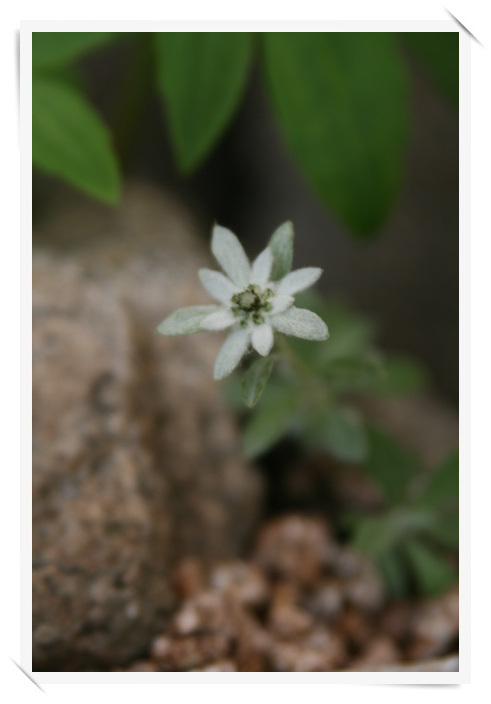

In [1]:
import cv2
import numpy as np
import os
from glob import glob
from os.path import join
import tarfile
import urllib

from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
import os
img_path = os.getenv('HOME')+'/work/project/pro_10_humanSegmentation/pixabay_images/child-1031171_1280.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
#img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/person-822803_640.jpg'  # 본인이 선택한 이미지의 경로에 맞게 바꿔 주세요. 
img_orig = cv2.imread(img_path) 
print (img_orig.shape)

(853, 1280, 3)


In [3]:
class DeepLabModel(object):
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    INPUT_SIZE = 513
    FROZEN_GRAPH_NAME = 'frozen_inference_graph'

    # __init__()에서 모델 구조를 직접 구현하는 대신, tar file에서 읽어들인 그래프구조 graph_def를 
    # tf.compat.v1.import_graph_def를 통해 불러들여 활용하게 됩니다. 
    def __init__(self, tarball_path):
        self.graph = tf.Graph()
        graph_def = None
        tar_file = tarfile.open(tarball_path)
        for tar_info in tar_file.getmembers():
            if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
                file_handle = tar_file.extractfile(tar_info)
                graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
                break
        tar_file.close()

        with self.graph.as_default():
    	    tf.compat.v1.import_graph_def(graph_def, name='')

        self.sess = tf.compat.v1.Session(graph=self.graph)

    # 이미지를 전처리하여 Tensorflow 입력으로 사용 가능한 shape의 Numpy Array로 변환합니다.
    def preprocess(self, img_orig):
        height, width = img_orig.shape[:2]
        resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
        target_size = (int(resize_ratio * width), int(resize_ratio * height))
        resized_image = cv2.resize(img_orig, target_size)
        resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        img_input = resized_rgb
        return img_input
        
    def run(self, image):
        img_input = self.preprocess(image)

        # Tensorflow V1에서는 model(input) 방식이 아니라 sess.run(feed_dict={input...}) 방식을 활용합니다.
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [img_input]})

        seg_map = batch_seg_map[0]
        return cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR), seg_map

In [4]:
# define model and download & load pretrained weight
_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'

model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
tf.io.gfile.makedirs(model_dir)

print ('temp directory:', model_dir)

download_path = os.path.join(model_dir, 'deeplab_model.tar.gz')
if not os.path.exists(download_path):
    urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + 'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
                   download_path)

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

temp directory: /home/aiffel/aiffel/human_segmentation/models
model loaded successfully!


In [5]:
img_resized, seg_map = MODEL.run(img_orig)
print (img_orig.shape, img_resized.shape, seg_map.max())

(853, 1280, 3) (341, 513, 3) 15


In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

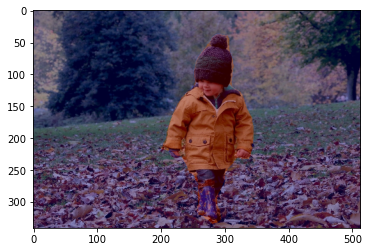

In [7]:
img_show = img_resized.copy()
seg_map = np.where(seg_map == 15, 15, 0) # 예측 중 사람만 추출
img_mask = seg_map * (255/seg_map.max()) # 255 normalization
img_mask = img_mask.astype(np.uint8)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

cv2.resize() 함수를 이용합니다. 크기를 키울 때 보간(interpolation) 을 고려해야 하는데요, cv2.INTER_NEAREST를 이용해서 깔끔하게 처리할 수 있지만 더 정확히 확대하기 위해 cv2.INTER_LINEAR 를 사용합니다. 여기서 보간법(interpolation)은 이미지의 크기를 변경(scaling)하는 과정에서 컴퓨터가 사이사이 픽셀값을 채우는 방법

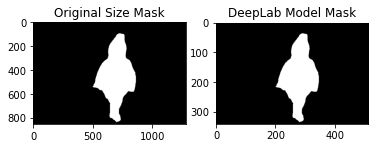

In [8]:
img_mask_up = cv2.resize(img_mask, img_orig.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up = cv2.threshold(img_mask_up, 128, 255, cv2.THRESH_BINARY)

ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

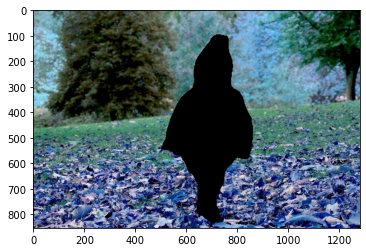

In [9]:
img_mask_color = cv2.cvtColor(img_mask_up, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg = cv2.bitwise_and(img_orig, img_bg_mask)
plt.imshow(img_bg)
plt.show()

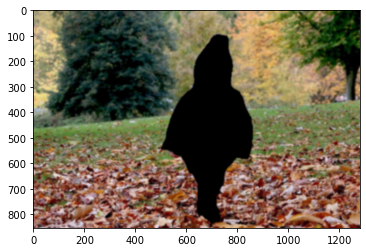

In [10]:
img_bg_blur = cv2.GaussianBlur(img_bg, (13, 13), 0)
# img_bg_blur = cv2.blur(img_bg, (13,13))

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

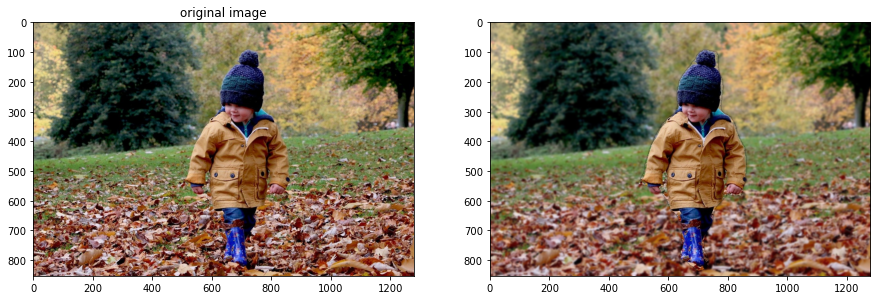

In [12]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

cv2.imwrite('./result/test_001.jpg', img_concat)

plt.figure(figsize=(15, 20))
plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()